In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report
from mlxtend.plotting import plot_confusion_matrix

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')
df['Gender'].replace({'Female':0, 'Male': 1}, inplace=True)
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [3]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [4]:
x=df[['User ID', 'Gender', 'Age', 'EstimatedSalary']]
y=df[['Purchased']]

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state=42)

In [6]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(320, 4) (80, 4) (320, 1) (80, 1)


In [7]:
model=LogisticRegression()
model.fit(x_train, y_train)

C:\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [8]:
y_pred=model.predict(x_test)

In [9]:
model.score(x_train, y_train)

0.7875

In [10]:
model.score(x_test, y_test)

0.7375

In [11]:
print(confusion_matrix.__doc__)

Compute confusion matrix to evaluate the accuracy of a classification.

    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` and
    predicted to be in group :math:`j`.

    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.

    Read more in the :ref:`User Guide <confusion_matrix>`.

    Parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.

    y_pred : array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.

    labels : array-like of shape (n_classes), default=None
        List of labels to index the matrix. This may be used to reorder
        or select a subset of labels.
        If ``None`` is given, those that appear at least once
        in ``y

In [12]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[49  3]
 [18 10]]


(<Figure size 500x500 with 1 Axes>,
 <AxesSubplot: xlabel='predicted label', ylabel='true label'>)

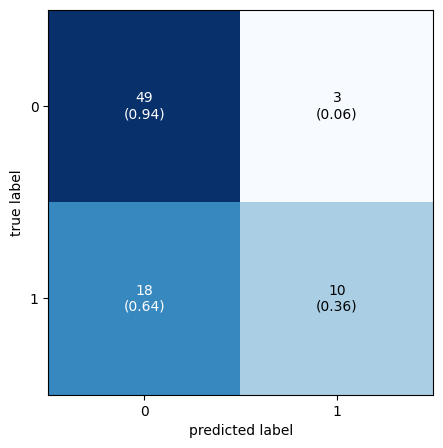

In [13]:
plot_confusion_matrix(conf_mat=cm, figsize=(5,5), show_normed=True)

In [14]:
print(f"TN value is {cm[0][0]}")
print(f"FP value is {cm[0][1]}")
print(f"FN value is {cm[1][0]}")
print(f"TP value is {cm[1][1]}")

TN value is 49
FP value is 3
FN value is 18
TP value is 10


In [15]:
print(f"Accuracy score is {accuracy_score(y_test, y_pred)}")
print(f"Error rate is {1-accuracy_score(y_test, y_pred)}")
print(f"Precision score is {precision_score(y_test, y_pred)}")
print(f"Recall score is {recall_score(y_test, y_pred)}")

Accuracy score is 0.7375
Error rate is 0.26249999999999996
Precision score is 0.7692307692307693
Recall score is 0.35714285714285715


In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.94      0.82        52
           1       0.77      0.36      0.49        28

    accuracy                           0.74        80
   macro avg       0.75      0.65      0.66        80
weighted avg       0.74      0.74      0.71        80

